In [618]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


plt.style.use('seaborn-colorblind')



In [619]:
data = pd.read_csv("C:/Users/busta/PycharmProjects/module3/data/train.csv")
print(data.shape)
data.head(8)

(519803, 57)


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,885116c8-8e5c-4d4e-af4d-1fd53c6b2464,1.543564e+09,7,30,11,2018-11-30 07:47:56,America/New_York,North Station,South Station,Lyft,...,0.0003,1543593600,28.78,1543579200,42.64,1543600800,26.35,1543575600,40.61,1543611600
1,93fb610d-bb94-45bc-98b8-0a4a2e349ab2,1.544822e+09,21,14,12,2018-12-14 21:20:11,America/New_York,West End,South Station,Uber,...,0.0000,1544806800,26.76,1544788800,46.90,1544814000,27.41,1544788800,44.15,1544817600
2,69244a0f-6ec6-4265-b73e-3dcb069d671e,1.543834e+09,10,3,12,2018-12-03 10:52:59,America/New_York,Theatre District,Boston University,Lyft,...,0.0007,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,57.20,1543852800
3,230cbecb-368e-4b8d-b9f1-67a40f68991f,1.543759e+09,14,2,12,2018-12-02 14:03:04,America/New_York,Boston University,Back Bay,Uber,...,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
4,6c873c64-967e-47f2-bd89-5ec6fd330aa3,1.544973e+09,15,16,12,2018-12-16 15:05:17,America/New_York,Financial District,North End,Lyft,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
5,75b77247-8295-40ef-8bbe-cdd828cfac43,1.544917e+09,23,15,12,2018-12-15 23:40:17,America/New_York,Northeastern University,North Station,Lyft,...,0.0081,1544893200,39.68,1544929200,54.46,1544896800,36.43,1544929200,53.79,1544896800
6,bd771dc8-2d78-4675-9f52-3b086053a248,1.543716e+09,2,2,12,2018-12-02 02:08:01,America/New_York,Theatre District,Boston University,Lyft,...,0.0000,1543683600,30.17,1543662000,44.11,1543690800,25.87,1543662000,43.44,1543690800
7,3fd8a06a-4b03-447f-9634-447cab38bd7b,1.543423e+09,16,28,11,2018-11-28 16:41:08,America/New_York,Financial District,Haymarket Square,Uber,...,0.0000,1543420800,33.75,1543399200,42.60,1543438800,29.97,1543399200,36.58,1543438800


In [620]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519803 entries, 0 to 519802
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           519803 non-null  object 
 1   timestamp                    519803 non-null  float64
 2   hour                         519803 non-null  int64  
 3   day                          519803 non-null  int64  
 4   month                        519803 non-null  int64  
 5   datetime                     519803 non-null  object 
 6   timezone                     519803 non-null  object 
 7   source                       519803 non-null  object 
 8   destination                  519803 non-null  object 
 9   cab_type                     519803 non-null  object 
 10  product_id                   519803 non-null  object 
 11  name                         519803 non-null  object 
 12  price                        478523 non-null  float64
 13 

In [621]:
def check_missing(data, output_path=None):
    result = pd.concat([data.isnull().sum(), data.isnull().mean()], axis=1)
    result = result.rename(index=str, columns={0: 'total missing', 1: 'proportion'})
    if output_path is not None:
        result.to_csv(output_path + 'missing.csv')
        print(output_path, 'missing.csv')
    return result


check_missing(data=data)

,total missing,proportion
id,0,0.000000
timestamp,0,0.000000
hour,0,0.000000
day,0,0.000000
month,0,0.000000
datetime,0,0.000000
timezone,0,0.000000
source,0,0.000000
destination,0,0.000000
cab_type,0,0.000000


In [622]:
def drop_missing(data, axis=0):
    data_copy = data.copy(deep=True)
    data_copy = data_copy.dropna(axis=axis, inplace=False)
    return data_copy


data2 = drop_missing(data=data)
data2.shape

(478523, 57)

In [623]:
data2.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,4.785230e+05,478523.000000,478523.000000,478523.000000,478523.000000,478523.000000,478523.000000,478523.000000,478523.000000,478523.000000,...,478523.000000,4.785230e+05,478523.000000,4.785230e+05,478523.000000,4.785230e+05,478523.000000,4.785230e+05,478523.000000,4.785230e+05
mean,1.544046e+09,11.612309,17.800992,11.586442,16.537459,2.188046,1.015059,42.338131,-71.066142,39.577745,...,0.037438,1.544044e+09,33.450042,1.544042e+09,45.252788,1.544047e+09,29.721148,1.544048e+09,41.989126,1.544048e+09
std,6.893312e+05,6.948700,9.978423,0.492472,9.328754,1.135612,0.095486,0.047878,0.020310,6.730661,...,0.055259,6.913752e+05,6.473617,6.903332e+05,5.644597,6.903132e+05,7.118395,6.873053e+05,6.931255,6.912569e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.270000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,28.900000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544827e+09,18.000000,28.000000,12.000000,22.500000,2.930000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.090000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


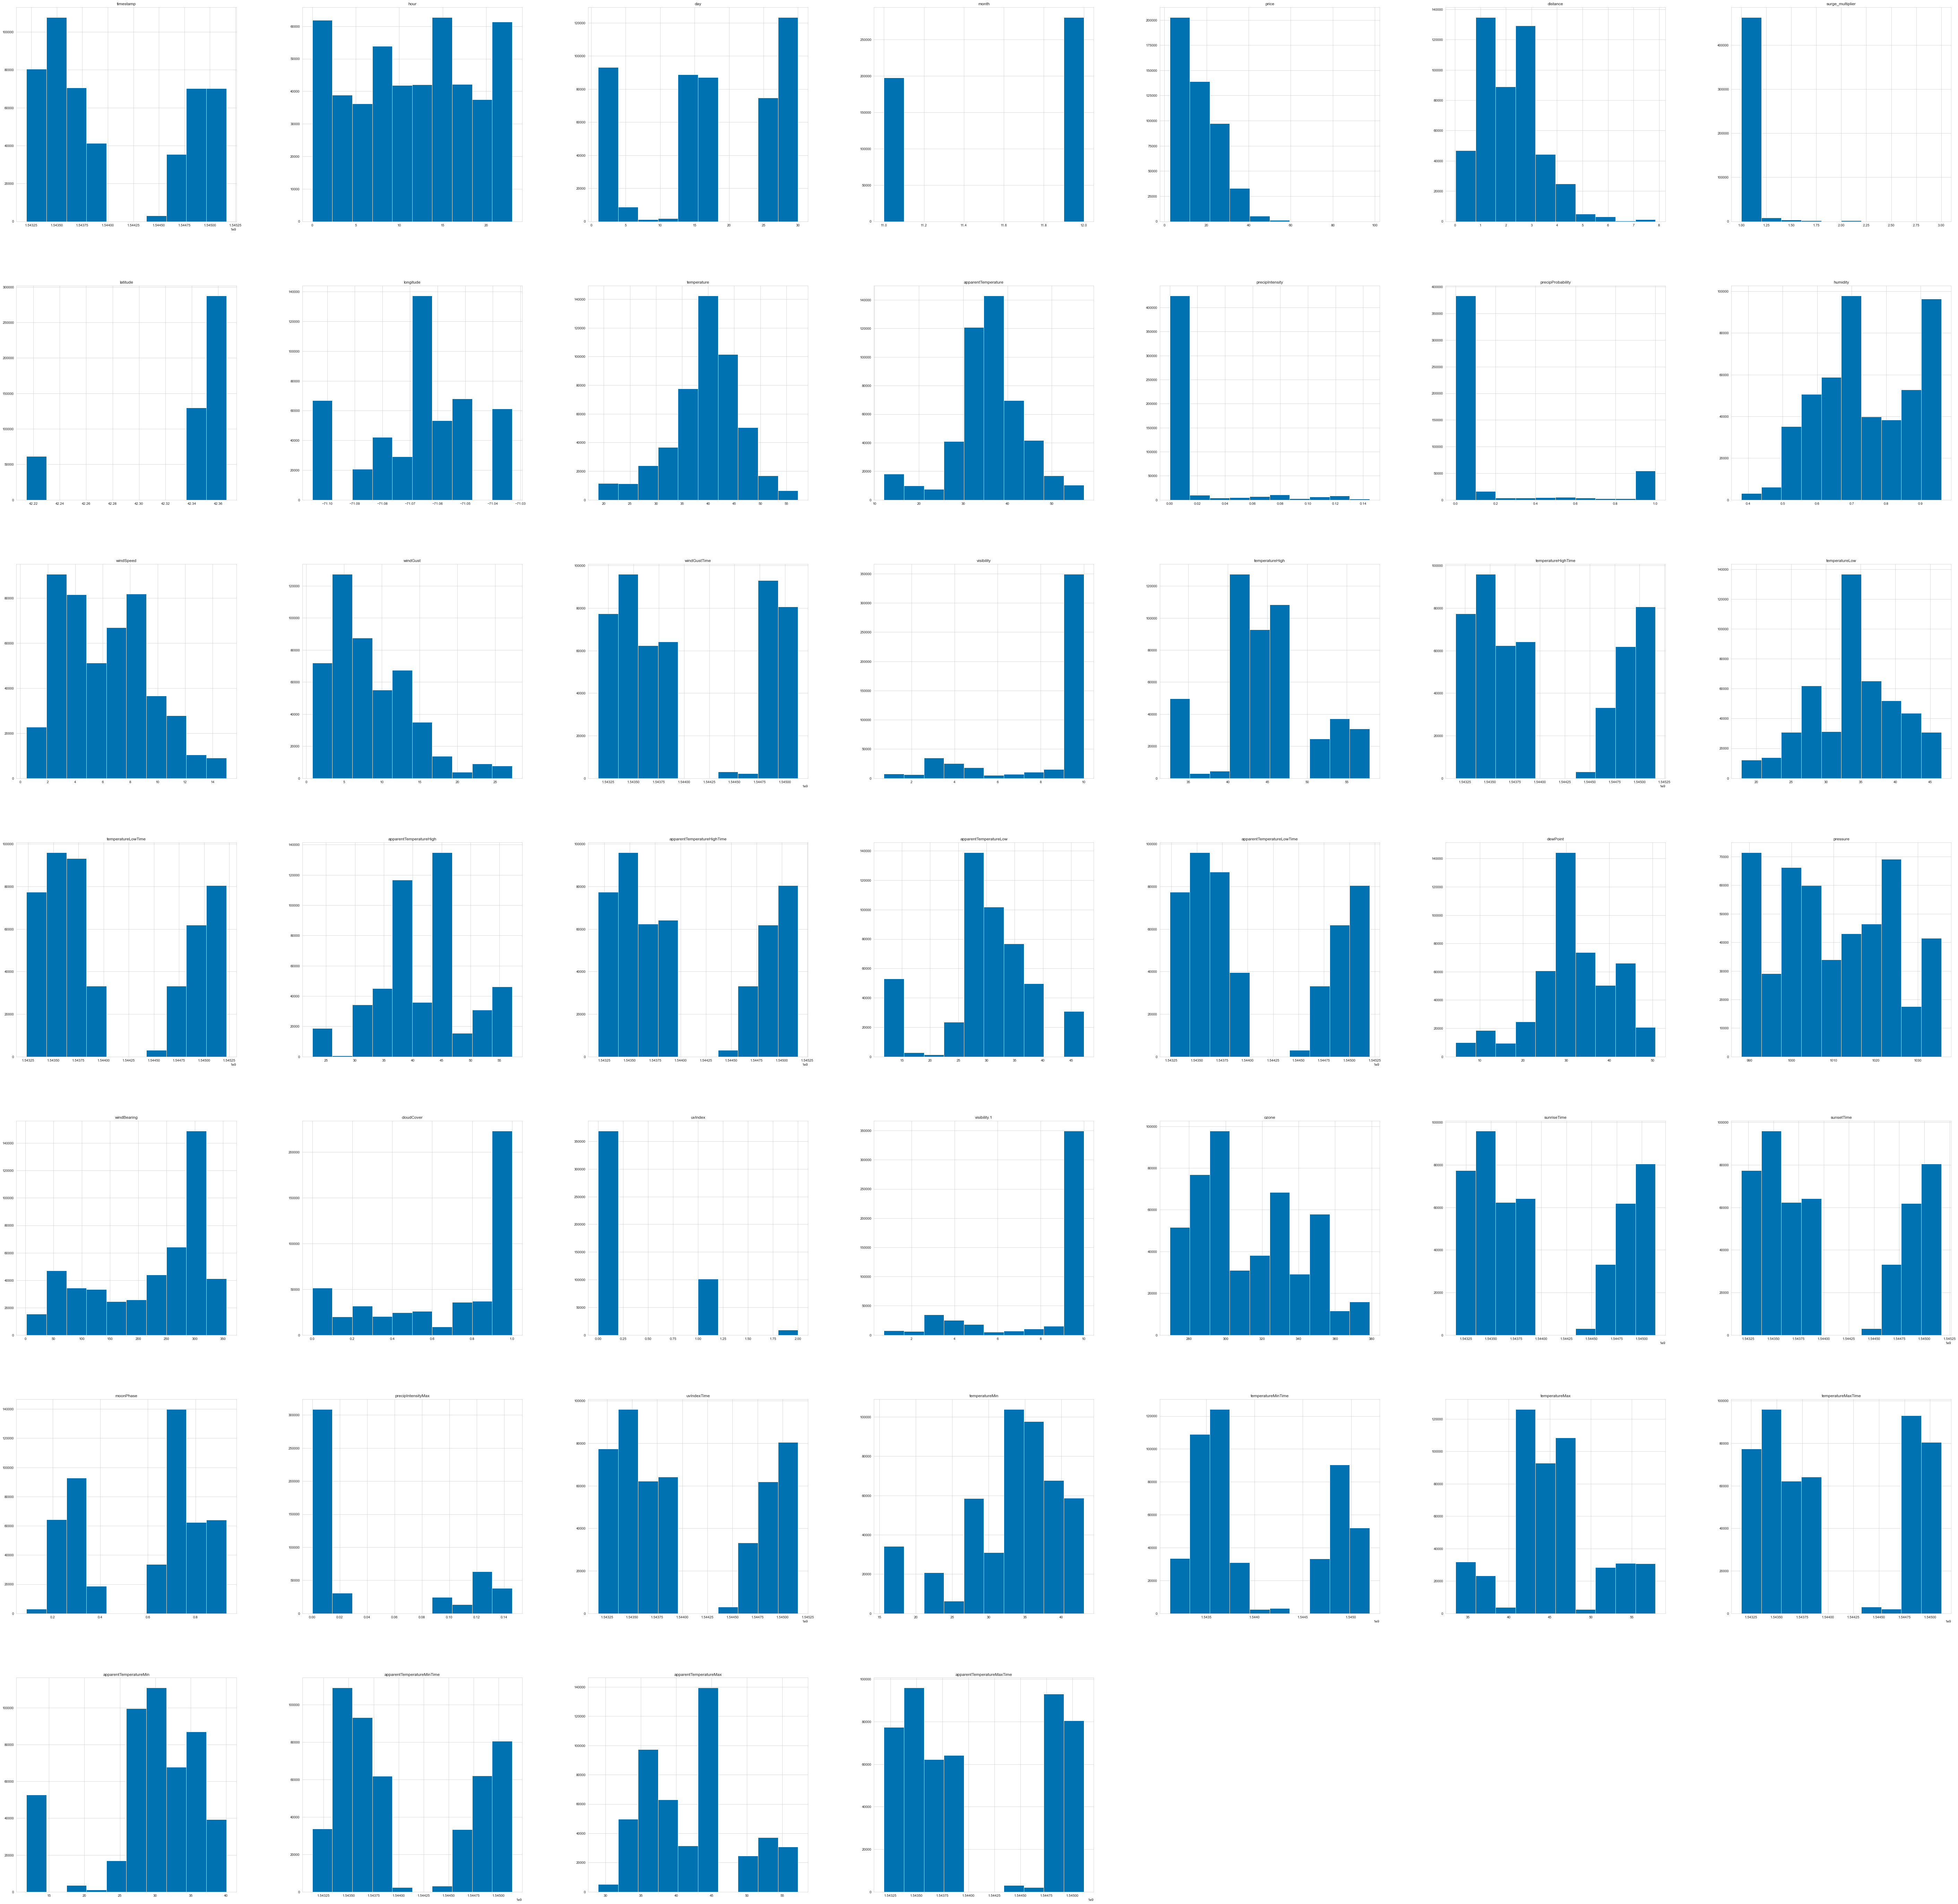

In [598]:
data2.hist(figsize=(100, 100));

In [624]:
data2.drop(['id', 'timestamp', 'datetime', 'product_id', 'timezone'], axis=1,inplace=True )
data2.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,7,30,11,North Station,South Station,Lyft,Lyft,9.0,2.07,1.0,...,0.0003,1543593600,28.78,1543579200,42.64,1543600800,26.35,1543575600,40.61,1543611600
1,21,14,12,West End,South Station,Uber,Black SUV,27.0,2.14,1.0,...,0.0000,1544806800,26.76,1544788800,46.90,1544814000,27.41,1544788800,44.15,1544817600
2,10,3,12,Theatre District,Boston University,Lyft,Shared,10.5,4.80,1.0,...,0.0007,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,57.20,1543852800
3,14,2,12,Boston University,Back Bay,Uber,UberX,7.0,0.03,1.0,...,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
4,15,16,12,Financial District,North End,Lyft,Lyft,7.0,1.02,1.0,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800


In [625]:
# Сделали OHE для категориальной переменной
df_categor = pd.get_dummies(data2['cab_type'], drop_first=True, prefix='cab_type')
# Объединили назад наши таблички
data3 = pd.concat([data2.drop('cab_type',axis=1),df_categor], axis=1)

df_categor = pd.get_dummies(data2['name'], drop_first=True, prefix='name')
data3 = pd.concat([data3.drop('name',axis=1),df_categor], axis=1)

df_categor = pd.get_dummies(data2['source'], drop_first=True, prefix='source')
data3 = pd.concat([data3.drop('source',axis=1),df_categor], axis=1)

df_categor = pd.get_dummies(data2['destination'], drop_first=True, prefix='destination')
data3 = pd.concat([data3.drop('destination',axis=1),df_categor], axis=1)

df_categor = pd.get_dummies(data2['short_summary'], drop_first=True, prefix='short_summary')
data3 = pd.concat([data3.drop('short_summary',axis=1),df_categor], axis=1)

df_categor = pd.get_dummies(data2['long_summary'], drop_first=True, prefix='long_summary')
data3 = pd.concat([data3.drop('long_summary',axis=1),df_categor], axis=1)

df_categor = pd.get_dummies(data2['icon'], drop_first=True, prefix='icon')
data3 = pd.concat([data3.drop('icon',axis=1),df_categor], axis=1)

data3.head()

,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,...,long_summary_ Possible drizzle in the morning.,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening.",icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,7,30,11,9.0,2.07,1.0,42.3559,-71.0550,30.42,30.42,...,0,0,0,0,1,0,0,0,0,0
1,21,14,12,27.0,2.14,1.0,42.3398,-71.0892,42.91,41.40,...,0,0,0,0,0,0,0,0,1,0
2,10,3,12,10.5,4.80,1.0,42.2148,-71.0330,48.43,48.43,...,0,0,0,0,0,1,0,0,0,0
3,14,2,12,7.0,0.03,1.0,42.3588,-71.0707,43.51,39.58,...,0,0,0,0,0,0,0,0,0,1
4,15,16,12,7.0,1.02,1.0,42.3647,-71.0542,42.25,37.39,...,0,0,1,0,0,1,0,0,0,0


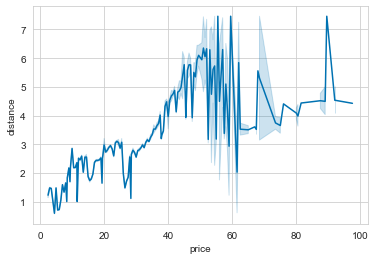

In [601]:
sns.lineplot(data = data2, x = 'price', y ='distance' );


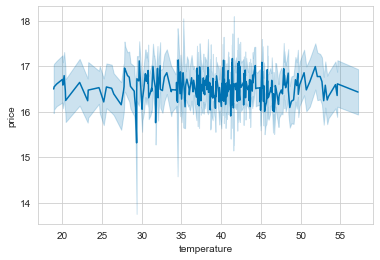

In [602]:
sns.lineplot(data = data2, x = 'temperature' , y ='price' );

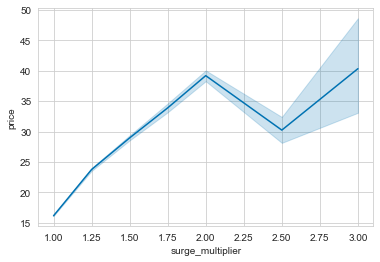

In [603]:
sns.lineplot(data = data2, x = 'surge_multiplier', y ='price' );

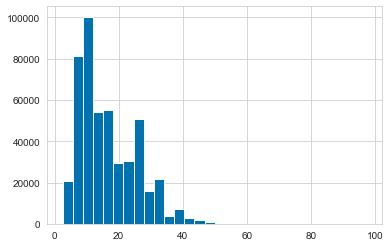

In [604]:
data2.price.hist(bins=30);

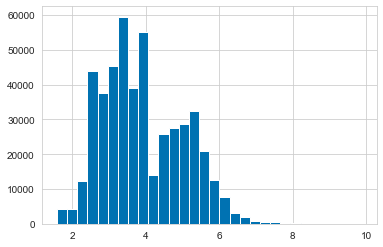

In [626]:
data2['price'] = np.sqrt(data2['price'])
data2.price.hist(bins=30);

In [627]:
#data2.corr()

In [628]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data3, test_size = 0.3)
Y_train, Y_test = df_train.price, df_test.price
X_train, X_test = df_train.drop('price', axis=1), df_test.drop('price', axis=1)
print(X_train.shape)

(334966, 102)


In [629]:
def constant_feature_detect(data, threshold=0.99):
    data_copy = data.copy(deep=True)
    quasi_constant_feature = []
    for feature in data_copy.columns:
        predominant = (data_copy[feature].value_counts() / np.float(
            len(data_copy))).sort_values(ascending=False).values[0]
        if predominant >= threshold:
            quasi_constant_feature.append(feature)
    print(len(quasi_constant_feature), 'константные переменные')
    print(quasi_constant_feature)
    return quasi_constant_feature


quasi_constant_feature = constant_feature_detect(data=X_train, threshold=0.99)


X_train.drop(labels=quasi_constant_feature, axis=1, inplace=True)
X_test.drop(labels=quasi_constant_feature, axis=1, inplace=True)
print(X_train.shape)


2 константные переменные
['long_summary_ Possible drizzle in the morning. ', 'long_summary_ Rain in the morning and afternoon. ']
(334966, 100)


In [630]:
def corr_feature_detect(data, threshold=0.8):
    corrmat = data.corr()
    corrmat = corrmat.abs().unstack()
    corrmat = corrmat.sort_values(ascending=False)
    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1]
    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']

    grouped_feature_ls = []
    correlated_groups = []

    for feature in corrmat.feature1.unique():
        if feature not in grouped_feature_ls:
            correlated_block = corrmat[corrmat.feature1 == feature]
            grouped_feature_ls = grouped_feature_ls + list(
                correlated_block.feature2.unique()) + [feature]

            correlated_groups.append(correlated_block)
    return correlated_groups


corr = corr_feature_detect(data=X_train, threshold=0.9)
for i in corr:
    print(i, '\n')


       feature1                     feature2      corr
0    sunsetTime                  sunriseTime  1.000000
3    sunsetTime                  uvIndexTime  0.999997
15   sunsetTime          temperatureHighTime  0.999920
19   sunsetTime  apparentTemperatureHighTime  0.999910
33   sunsetTime   apparentTemperatureLowTime  0.999844
39   sunsetTime           temperatureLowTime  0.999822
47   sunsetTime   apparentTemperatureMaxTime  0.999792
51   sunsetTime           temperatureMaxTime  0.999792
76   sunsetTime                 windGustTime  0.999357
103  sunsetTime           temperatureMinTime  0.999002
107  sunsetTime   apparentTemperatureMinTime  0.998973 

            feature1                 feature2      corr
132  temperatureHigh           temperatureMax  0.985942
139  temperatureHigh  apparentTemperatureHigh  0.958717
144  temperatureHigh   apparentTemperatureMax  0.951005 

              feature1     feature2      corr
136  precipProbability  icon_ rain   0.968435 

                  

In [631]:
def delete_corr_features(corr, train_data, test_data, Y_train):
    '''Удаляет мультиколлинеарные признаки по принципу: оставить тот, у которого наибольшая корреляция с предсказываемой переменной (Y) '''

    labels_for_del = [] # названия полей, которые будут удалены
    for i in range (len(corr)):

        cor_f = corr[i]
        l = cor_f.shape[0]+1
        features_corr_with_Y = [[0]*l,[0]*l] # споисок: [названия мультиколлиниарных полей], [корреляция с Y]
        features_corr_with_Y[0][0]=cor_f.iloc[0,0]
        features_corr_with_Y[1][0] = abs(np.corrcoef(train_data[cor_f.iloc[0,0]], Y_train)[1,0])

        for j in range (1, l):
           features_corr_with_Y[0][j]=cor_f.iloc[j-1,1]
           features_corr_with_Y[1][j] = abs(np.corrcoef(train_data[cor_f.iloc[j-1,1]], Y_train)[1,0])

        index = features_corr_with_Y[1].index(max(features_corr_with_Y[1]))
        del(features_corr_with_Y[0][index])
        labels_for_del = labels_for_del+[item for item in features_corr_with_Y[0]]
    print("Features for deleting:",labels_for_del)
    train_data.drop(labels=labels_for_del, axis=1, inplace=True)
    test_data.drop(labels=labels_for_del, axis=1, inplace=True)

delete_corr_features(corr, X_train, X_test, Y_train)
X_train.shape

Features for deleting: ['sunsetTime', 'sunriseTime', 'uvIndexTime', 'temperatureHighTime', 'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'temperatureLowTime', 'apparentTemperatureMaxTime', 'temperatureMaxTime', 'temperatureMinTime', 'apparentTemperatureMinTime', 'temperatureHigh', 'apparentTemperatureHigh', 'apparentTemperatureMax', 'precipProbability', 'temperatureMin', 'apparentTemperature', 'windSpeed', 'temperatureLow']


(334966, 81)

In [632]:
X_train.head()

,hour,day,month,distance,surge_multiplier,latitude,longitude,temperature,precipIntensity,humidity,...,long_summary_ Overcast throughout the day.,long_summary_ Partly cloudy throughout the day.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening.",icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
345921,13,13,12,2.79,1.0,42.3519,-71.0643,22.18,0.0000,0.64,...,0,1,0,0,0,0,0,1,0,0
439778,13,28,11,2.61,1.0,42.2148,-71.0330,35.98,0.0000,0.70,...,0,0,0,0,0,0,0,1,0,0
224521,14,1,12,4.55,1.0,42.3647,-71.0542,36.99,0.0000,0.68,...,0,0,0,0,0,0,0,1,0,0
80738,20,13,12,2.66,1.0,42.3647,-71.0542,33.15,0.0000,0.57,...,0,1,0,0,0,0,0,1,0,0
124111,3,27,11,4.48,1.0,42.3661,-71.0631,43.73,0.1088,0.89,...,0,0,0,1,0,0,0,0,0,1


In [633]:
code_col_ind = X_train.columns.get_loc('cab_type_Uber') # номер колонки, с которой начинаются качественные переменные


In [634]:
from sklearn.preprocessing import StandardScaler

# объявили объект стандартного шкалирования
scaler = StandardScaler()
# учим скалировщик скалировать все переменны на трэйне
scaler.fit(X_train.iloc[:, 0:code_col_ind-1])

# Применяем скалировщик к трэйну
X_train_scale = scaler.transform(X_train.iloc[:, 0:code_col_ind-1])

# Применяем скалирвощик к тесту
X_test_scale = scaler.transform(X_test.iloc[:, 0:code_col_ind-1])

In [635]:
# Заменяем значения на отскалированные
X_train.iloc[:, 0:code_col_ind-1] = X_train_scale
X_test.iloc[:, 0:code_col_ind-1] = X_test_scale

In [636]:
def print_metrics(y_test,y_pred):
    from sklearn import metrics
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(y_test, y_pred))

    pass


from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке
model_regression.fit(X_train, Y_train)

# Сделали прогнозы на тестовой выборке
Y_pred_regr = model_regression.predict(X_test)
print_metrics(Y_test, Y_pred_regr)


MAE: 1.2516011828007326e+34
RMSE: 2.3698820262050798e+36
R2: 0.9297374302650079


In [637]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, Y_train)
print('Лучшее значение параметра:', lasso_cv.alpha_)

# Сделали прогнозы
Y_pred_lasso_cv = lasso_cv.predict(X_test)

Лучшее значение параметра: 0.0032250505258798814


In [638]:
print_metrics(Y_test,Y_pred_lasso_cv)

MAE: 1.2516011828007517e+34
RMSE: 2.369882026205098e+36
R2: 0.9296781544451275


Вывод: обычная линейная регрессия показывает такие же результаты как и лассо-регрессия, значит все значимые признаки были хорошо отобраны во время предобработки данных. Можно использовать линейную регрессию в чистом виде.